In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
heart=pd.read_csv('C:\Personal\ML\Projects\Healthcare\heart_disease\processed.cleveland.data')
heart.columns=['age','sex','chest_pain','resting_bp','serum_chol','f_blood_sugar','resting_ecg',
             'max_heart_rate','exercise_angina','oldpeak','slope','num_colored','thal','diagnosis']
print('Dataset containing relevant information of patients:')
print('Unique values under diagnosis column are:')
print(heart['diagnosis'].unique())
print('Value counts of diagnosis:')
print(heart['diagnosis'].value_counts())

print('Shape of og dataset:')
print(heart.shape)
heart_target=heart[['diagnosis']]
heart_input=heart.iloc[:,:13]
print('Shape of input features:')
print(heart_input.shape)

print('Head of input features:')
print(heart_input.head(10))


#checking which columns contain na values
print('Checking na values of target feature:')
print(heart_target.isna().value_counts())

print('Checking na values of input dataframe:')
columns_with_na=heart_input.columns[heart_input.isna().any()].tolist()
print(columns_with_na)
#.isna() returns dataframe with False for no NaN value, true for NaN value. .any() checks if there are any true values
#.columns returns column labels of columns having null value

heart_num=heart_input.select_dtypes(include=[np.number])
print('Numeric columns of input dataframe:')
print(heart_num)

Dataset containing relevant information of patients:
Unique values under diagnosis column are:
[2 1 0 3 4]
Value counts of diagnosis:
0    163
1     55
2     36
3     35
4     13
Name: diagnosis, dtype: int64
Shape of og dataset:
(302, 14)
Shape of input features:
(302, 13)
Head of input features:
    age  sex  chest_pain  resting_bp  serum_chol  f_blood_sugar  resting_ecg  \
0  67.0  1.0         4.0       160.0       286.0            0.0          2.0   
1  67.0  1.0         4.0       120.0       229.0            0.0          2.0   
2  37.0  1.0         3.0       130.0       250.0            0.0          0.0   
3  41.0  0.0         2.0       130.0       204.0            0.0          2.0   
4  56.0  1.0         2.0       120.0       236.0            0.0          0.0   
5  62.0  0.0         4.0       140.0       268.0            0.0          2.0   
6  57.0  0.0         4.0       120.0       354.0            0.0          0.0   
7  63.0  1.0         4.0       130.0       254.0            0

Correlation dataframe for diagnosis with other attributes:
age                0.225809
sex                0.226601
chest_pain         0.405182
resting_bp         0.159978
serum_chol         0.070315
f_blood_sugar      0.065937
resting_ecg        0.186769
max_heart_rate    -0.415399
exercise_angina    0.395996
oldpeak            0.508330
slope              0.387417
diagnosis          1.000000
Name: diagnosis, dtype: float64
Average age of individuals suffering from heart disease of degree 1:
55.38181818181818
Average age of individuals suffering from heart disease of degree 2:
58.02777777777778
Average age of individuals suffering from heart disease of degree 3:
56.0
Average age of individuals suffering from heart disease of degree 4:
59.69230769230769
No of individuals affected as a result of exercise:
0.0    203
1.0     99
Name: exercise_angina, dtype: int64
Percentages of those already afflicted, as a result of exercise:
1.0    0.546763
0.0    0.453237
Name: exercise_angina, dtype: f

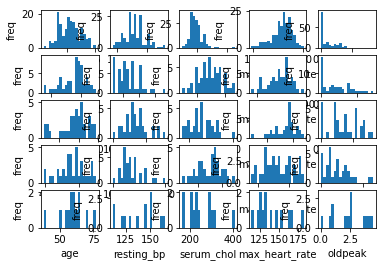

Grouping by sex
For female, chest pain visualization:


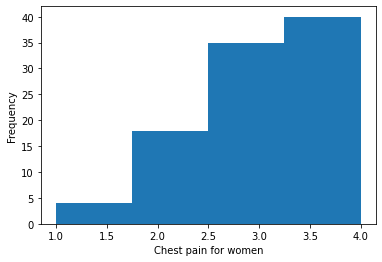

For male, chest pain visualization:


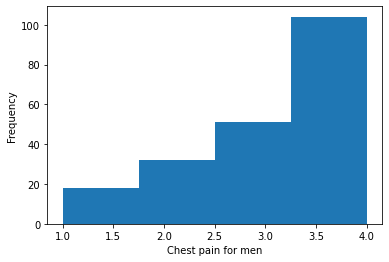

In [2]:
heart_c=heart.corr()
print('Correlation dataframe for diagnosis with other attributes:')
print(heart_c['diagnosis'])

for c in range(1,5):
    filt=heart['diagnosis']==c
    print(f'Average age of individuals suffering from heart disease of degree {c}:')
    print(heart.loc[filt,'age'].mean())
    
print('No of individuals affected as a result of exercise:')
print(heart['exercise_angina'].value_counts())
filt=heart['diagnosis']>=1
print('Percentages of those already afflicted, as a result of exercise:')
print(heart.loc[filt,'exercise_angina'].value_counts(normalize=True))#54%


print('Histogram plots of certain attributes')
num_attr=['age','resting_bp','serum_chol','max_heart_rate','oldpeak']
heart_group=heart.groupby('diagnosis')
m=0
for i in range(0,5):
    for attribute in num_attr:
        m+=1
        plt.subplot(5,5,m)
        plt.hist(heart_group.get_group(i)[attribute],bins=20)
        plt.xlabel(attribute)
        plt.ylabel('freq')
plt.show()
#as diagnosis severity increases, serum_chol,oldpeak tendency shifts right,greater ST depression and serum cholestrol conc
#as severity increases, max heart rate slowed



#GROUPING BY SEX
print('Grouping by sex')
heart_sex=heart.groupby('sex')
print('For female, chest pain visualization:')
plt.hist(heart_sex.get_group(0)['chest_pain'],bins=4,label=['TAng','ATang','Nang','AS'])
plt.xlabel('Chest pain for women')
plt.ylabel('Frequency')
plt.show()
heart_sex=heart.groupby('sex')
print('For male, chest pain visualization:')
plt.hist(heart_sex.get_group(1)['chest_pain'],bins=4,label=['TAng','ATang','Nang','AS'])
plt.xlabel('Chest pain for men')
plt.ylabel('Frequency')
plt.show()


In [3]:
#non numeric columns
print('Non numeric columns of dataframe')
print(heart.select_dtypes(include=object))
print('Unique values of thal attribute')
print(heart['thal'].unique())
print('Unique values of num_colored attribute')
print(heart['num_colored'].unique())


print('Value distribution of both thal and num_colored attributes')
print(heart['thal'].value_counts())
print(heart['num_colored'].value_counts())

#replacing '?' column with most frequent value
heart['thal']=heart['thal'].replace('?',3.0)
heart['num_colored']=heart['num_colored'].replace('?',0.0)

heart['thal'] = pd.to_numeric(heart['thal'], errors='coerce')
heart['num_colored']=pd.to_numeric(heart['num_colored'],errors='coerce')
print('Type of thal attributes after conversion:')
print(heart['thal'].dtype)

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x=heart[['age','resting_bp', 'serum_chol', 'max_heart_rate']]
x_scaled=scaler.fit_transform(x)
heart[['age','resting_bp', 'serum_chol', 'max_heart_rate']]=x_scaled
print('Values of dataframe after scaling attributes age,resting_bp,serum_chol,max_heart_rate')
print(heart.head(5))

Non numeric columns of dataframe
    num_colored thal
0           3.0  3.0
1           2.0  7.0
2           0.0  3.0
3           0.0  3.0
4           0.0  3.0
..          ...  ...
297         0.0  7.0
298         2.0  7.0
299         1.0  7.0
300         1.0  3.0
301           ?  3.0

[302 rows x 2 columns]
Unique values of thal attribute
['3.0' '7.0' '6.0' '?']
Unique values of num_colored attribute
['3.0' '2.0' '0.0' '1.0' '?']
Value distribution of both thal and num_colored attributes
3.0    166
7.0    117
6.0     17
?        2
Name: thal, dtype: int64
0.0    175
1.0     65
2.0     38
3.0     20
?        4
Name: num_colored, dtype: int64
Type of thal attributes after conversion:
float64
Values of dataframe after scaling attributes age,resting_bp,serum_chol,max_heart_rate
        age  sex  chest_pain  resting_bp  serum_chol  f_blood_sugar  \
0  1.394920  1.0         4.0    1.612596    0.758372            0.0   
1  1.394920  1.0         4.0   -0.662326   -0.342633            0.0   
2 

C:\Personal\ANACONDA_NAVIGATOR\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Personal\ANACONDA_NAVIGATOR\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Personal\ANACONDA_NAVIGATOR\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Precison,recall and other metrics for SGDClassifier
Precision score after optimization
0.4270174100902275
Recall score after optimization
0.5409836065573771
f1 score:
0.6697690223630436
CLASS SPECIFIC METRIC CALC:
Precision score of class 0
0.6041666666666666
Recall score of class 0
0.90625
f1 score of class 0
0.725
Precision score of class 1
0.0
Recall score of class 1
0.0
f1 score of class 1
1.0
Precision score of class 2
0.3333333333333333
Recall score of class 2
0.125
f1 score of class 2
0.18181818181818182
Precision score of class 3
0.16666666666666666
Recall score of class 3
0.1111111111111111
f1 score of class 3
0.13333333333333333
Precision score of class 4
1.0
Recall score of class 4
0.0
f1 score of class 4
0.0
Decision scores of x instances:
[[ -20.04522908   35.80441163 -109.05988534 -161.81902764 -185.39947205]
 [  77.43128988 -100.95621874 -241.50250507 -130.71915547 -357.64285871]
 [ -13.09331377   22.67655705 -119.34526279 -108.1412521  -179.81827706]
 [-118.64916337  -9

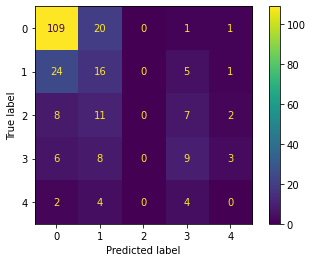

Binarized form of class labels
[[1 0 0 0 0]
 [1 0 0 0 0]]
Decision scores of x_test for classifier(ROC):
[  31.7016663    71.49812694  -63.80007729 -101.25702663 -216.65120213]
ROC AUC curve for individual classes are:


[]

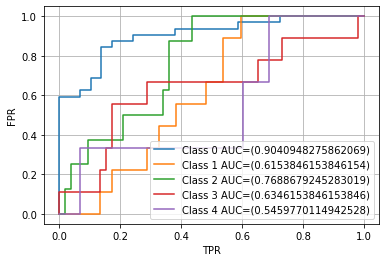

In [4]:
#splitting into test set and train set
from sklearn.model_selection import train_test_split
heart_input=heart[['age','sex','chest_pain','resting_bp','serum_chol','f_blood_sugar','resting_ecg',
             'max_heart_rate','exercise_angina','oldpeak','slope','num_colored','thal']]
heart_target=heart['diagnosis']
x_train,x_test,y_train,y_test=train_test_split(heart_input,heart_target,test_size=0.2,random_state=42)

#x_train=x_train[['chest_pain','max_heart_rate','exercise_angina','oldpeak','slope']]
#x_test=x_test[['chest_pain','max_heart_rate','exercise_angina','oldpeak','slope']]
#above are the reduced number of relevant features

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge', 'perceptron'],#LOSS FUNCTIONS
    'alpha':[0.1, 0.01, 0.001],#regularization strength (learning rate)
    'penalty':['l1', 'l2', 'elasticnet'],  # Type of penalty
    'max_iter':[100000],#no of iterations after updating coeffs each step
}

sgd_clf=SGDClassifier(random_state=42,max_iter=100000)
grid_search=GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=3, scoring='accuracy',error_score='raise')
grid_search.fit(x_train,y_train)

best_sgd=grid_search.best_estimator_
y_pred=best_sgd.predict(x_test)
from sklearn.metrics import precision_score,recall_score,f1_score
precision=precision_score(y_test,y_pred,average='weighted',zero_division=1.0)
#for some instances no predicted labels were found so precision in those cases assigned 1
print('Precison,recall and other metrics for SGDClassifier')
print('Precision score after optimization')
print(precision)
print('Recall score after optimization')
print(recall_score(y_test,y_pred,average='weighted',zero_division=1.0))
print('f1 score:')
print(f1_score(y_test,y_pred,average='weighted',zero_division=1.0))

print('CLASS SPECIFIC METRIC CALC:')#CALCULATES precision score etc for every individual class

sgd_clf.fit(x_train,y_train)
y_pred=sgd_clf.predict(x_test)
class_labels=sgd_clf.classes_ #list of column names
for label in class_labels:
    y_binary_pred=y_pred==label
    y_labels=y_test==label
    
    print(f"Precision score of class {label}")
    print(precision_score(y_labels,y_binary_pred,zero_division=1.0))
    print(f"Recall score of class {label}")
    print(recall_score(y_labels,y_binary_pred,zero_division=1.0))
    print(f"f1 score of class {label}")
    print(f1_score(y_labels,y_binary_pred,zero_division=1.0))
    

from sklearn.model_selection import cross_val_predict,cross_val_score
y_scores=cross_val_predict(sgd_clf,x_train,y_train,method='decision_function',cv=3)
#for decision function of test set: sgd_clf.decision_function(x_test)
from sklearn.metrics import precision_recall_curve

print('Decision scores of x instances:')
print(y_scores[:5])

print('accuracy of SGD classifier using cross_val_score:')
print(cross_val_score(sgd_clf,x_train,y_train,scoring='accuracy',cv=3))
#accuracy of model on the 3 folds

print('Displaying confusion matrix of the classifier:')
from sklearn.metrics import ConfusionMatrixDisplay
y_pred=cross_val_predict(sgd_clf,x_train,y_train,cv=3)
print('y_pred using cross_val_predict:')
print(y_pred[:10])
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
plt.show()

#ROC CURVE
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4])
y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4])
print('Binarized form of class labels')
print(y_train_bin[:2])

sgd_clf=SGDClassifier(random_state=42, max_iter=100000)
classifier=OneVsRestClassifier(sgd_clf)#binary classifier for every class

classifier.fit(x_train,y_train_bin)
y_score=classifier.decision_function(x_test)
print('Decision scores of x_test for classifier(ROC):')
print(y_score[0])

fpr=dict()
tpr=dict()
roc_auc=dict()
n_classes=y_train_bin.shape[1]
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} AUC=({roc_auc[i]})')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend(loc='lower right')
plt.grid(True)
print('ROC AUC curve for individual classes are:')
plt.plot()#AUC value closer to 1 means its better at distinguishing one class from another

Best parameters for svm classifier:
{'C': 1, 'degree': 3, 'kernel': 'poly'}
Precision score using svm classifier:
0.5489603393621737
Recall score using svm classifier:
0.6141078838174274
F1 score on svm classifier:
0.5711063056321635
Accuracy:
[0.61728395 0.625      0.6       ]
CLASS SPECIFIC METRIC CALC for SVM CLASSIFIER:
Precision score of class 0
0.7631578947368421
Recall score of class 0
0.90625
f1 score of class 0
0.8285714285714286
Precision score of class 1
0.15384615384615385
Recall score of class 1
0.2222222222222222
f1 score of class 1
0.18181818181818185
Precision score of class 2
0.5
Recall score of class 2
0.125
f1 score of class 2
0.2
Precision score of class 3
0.14285714285714285
Recall score of class 3
0.1111111111111111
f1 score of class 3
0.125
Precision score of class 4
0.0
Recall score of class 4
0.0
f1 score of class 4
0.0
Decision scores of x instances:
[[ 4.26865076  3.26040999  2.10742544  0.73827283 -0.27321713]
 [ 4.27370297  3.2661649   1.83175923  0.8527217

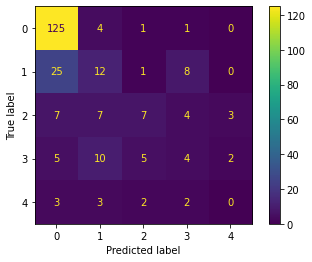

Binarized form of class labels
[[1 0 0 0 0]
 [1 0 0 0 0]]
Decision scores of x_test for classifier(ROC):
[-0.42595992 -0.91313498 -0.99843971 -1.09043675 -1.0761162 ]
ROC AUC curve for individual classes are:


[]

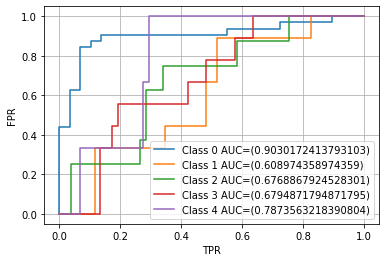

In [5]:
#using SVM classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm_clf=SVC(random_state=42)
param_grid={'C':[0.01,0.1,1,10],
           'kernel':['linear','poly','rbf'],
           'degree':[2,3]}
grid_search_svm=GridSearchCV(svm_clf,param_grid,cv=3,scoring='accuracy')
grid_search_svm.fit(x_train,y_train)

print('Best parameters for svm classifier:')
print(grid_search_svm.best_params_)

best_svm=grid_search_svm.best_estimator_
#best_svm.fit(x_train,y_train)
y_pred=cross_val_predict(best_svm,x_train,y_train,cv=3)

print('Precision score using svm classifier:')
print(precision_score(y_train,y_pred,average='weighted'))

print('Recall score using svm classifier:')
print(recall_score(y_train,y_pred,average='weighted'))
print('F1 score on svm classifier:')
print(f1_score(y_train,y_pred,average='weighted'))

print('Accuracy:')
print(cross_val_score(best_svm,x_train,y_train,scoring='accuracy',cv=3))

print('CLASS SPECIFIC METRIC CALC for SVM CLASSIFIER:')#CALCULATES precision score etc for every individual class

best_svm.fit(x_train,y_train)
y_pred=best_svm.predict(x_test)
class_labels=best_svm.classes_ #list of column names
for label in class_labels:
    y_binary_pred=y_pred==label
    y_labels=y_test==label
    
    print(f"Precision score of class {label}")
    print(precision_score(y_labels,y_binary_pred))
    print(f"Recall score of class {label}")
    print(recall_score(y_labels,y_binary_pred))
    print(f"f1 score of class {label}")
    print(f1_score(y_labels,y_binary_pred))#removed zero_division
    

from sklearn.model_selection import cross_val_predict,cross_val_score
y_scores=cross_val_predict(best_svm,x_train,y_train,method='decision_function',cv=3)
#for decision function of test set: sgd_clf.decision_function(x_test)
from sklearn.metrics import precision_recall_curve

print('Decision scores of x instances:')
print(y_scores[:5])

print('accuracy of SVM classifier using cross_val_score:')
print(cross_val_score(best_svm,x_train,y_train,scoring='accuracy',cv=3))
#accuracy of model on the 3 folds

print('Displaying confusion matrix of the SVM classifier:')
from sklearn.metrics import ConfusionMatrixDisplay
y_pred=cross_val_predict(best_svm,x_train,y_train,cv=3)
print('y_pred using cross_val_predict:')
print(y_pred[:5])
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
plt.show()

#ROC CURVE
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_train_bin=label_binarize(y_train,classes=[0,1,2,3,4])
y_test_bin=label_binarize(y_test,classes=[0,1,2,3,4])
print('Binarized form of class labels')
print(y_train_bin[:2])

svm_clf=SVC(random_state=42,C=1)
classifier=OneVsRestClassifier(svm_clf)#binary classifier for every class

classifier.fit(x_train,y_train_bin)
y_score=classifier.decision_function(x_test)
print('Decision scores of x_test for classifier(ROC):')
print(y_score[0])

fpr=dict()
tpr=dict()
roc_auc=dict()
n_classes=y_train_bin.shape[1]
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(y_test_bin[:,i],y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])

for i in range(n_classes):
    plt.plot(fpr[i],tpr[i],label=f'Class {i} AUC=({roc_auc[i]})')
plt.xlabel('TPR')
plt.ylabel('FPR')
plt.legend(loc='lower right')
plt.grid(True)
print('ROC AUC curve for individual classes are:')
plt.plot()#AUC value closer to 1 means its better at distinguishing one class from another

Precision score 1 of random forest classifier is:
0.4917901600474214
Recall 1 of random forest classifier is:
0.5767634854771784
Precision score of random forest classifier on test:
0.39672131147540984
Recall score of random forest classifier on test:
0.4918032786885246
CLASS SPECIFIC METRIC CALC for Random forest CLASSIFIER:
Precision score of class 0
0.725
Recall score of class 0
0.90625
f1 score of class 0
0.8055555555555555
Precision score of class 1
0.1111111111111111
Recall score of class 1
0.1111111111111111
f1 score of class 1
0.1111111111111111
Precision score of class 2
0.0
Recall score of class 2
0.0
f1 score of class 2
0.0
Precision score of class 3
0.0
Recall score of class 3
0.0
f1 score of class 3
0.0
Precision score of class 4
0.0
Recall score of class 4
0.0
f1 score of class 4
0.0
accuracy of random forest classifier using cross_val_score:
[0.56790123 0.6125     0.55      ]
Displaying confusion matrix of the random forest classifier:
y_pred using cross_val_predict:
[0 

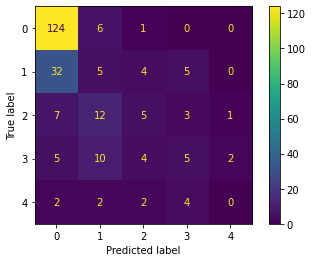

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#max_features gives no of features considered while splitting decision tree
#min_samples_split specifies minimum no of samples in a node in order to split it

rf_clf=RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10)
y_pred=cross_val_predict(rf_clf,x_train,y_train,cv=3)
print('Precision score 1 of random forest classifier is:')
print(precision_score(y_train,y_pred,average='weighted'))
#recall
print('Recall 1 of random forest classifier is:')
print(recall_score(y_train,y_pred,average='weighted'))

rf_clf.fit(x_train,y_train)
y_pred2=rf_clf.predict(x_test)
print('Precision score of random forest classifier on test:')
print(precision_score(y_test,y_pred2,average='weighted'))
print('Recall score of random forest classifier on test:')
print(recall_score(y_test,y_pred2,average='weighted'))

print('CLASS SPECIFIC METRIC CALC for Random forest CLASSIFIER:')#CALCULATES precision score etc for every individual class

rf_clf.fit(x_train,y_train)
y_pred=rf_clf.predict(x_test)
class_labels=rf_clf.classes_ #list of column names
for label in class_labels:
    y_binary_pred=y_pred==label
    y_labels=y_test==label
    
    print(f"Precision score of class {label}")
    print(precision_score(y_labels,y_binary_pred))
    print(f"Recall score of class {label}")
    print(recall_score(y_labels,y_binary_pred))
    print(f"f1 score of class {label}")
    print(f1_score(y_labels,y_binary_pred))#removed zero_division
    

from sklearn.model_selection import cross_val_predict,cross_val_score

print('accuracy of random forest classifier using cross_val_score:')
print(cross_val_score(rf_clf,x_train,y_train,scoring='accuracy',cv=3))
#accuracy of model on the 3 folds

print('Displaying confusion matrix of the random forest classifier:')
from sklearn.metrics import ConfusionMatrixDisplay
y_pred=cross_val_predict(rf_clf,x_train,y_train,cv=3)
print('y_pred using cross_val_predict:')
print(y_pred[:5])
ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
plt.show()

